# Project 1: Object Detection on Traffic Light Dataset

#### Maximum Points: 100

In this project, the goal is to train an object detection model to detect traffic light color using the dataset provided in this notebook. You can use any framework or model, for example YOLO or RT-DETR and inference techniques like SAHI for better detection of small objects. The focus is on creating an accurate and efficient solution for identifying traffic light color.

**The dataset is provided in YOLO format. However, you are free to convert it to any format of your choice according to the library that you are using**

**The dataset contains a total of 5 classes:**

```python
0: 'Green',
1: 'off',
2: 'red',
3: 'wait_on',
4: 'yellow'  
```

## Your Tasks

* Train an object detection model.
* Perform inference on the given video file.
* Share your inference video in an accessible format, such as uploading it to YouTube or providing a shared drive link.
* Provide a video or writeup link explaining your code and approach.

**Alternatively, you can also upload your writeup document to the online lab.**

**Mark Distribution**:

<div align="center">
    <table border="1" style="border-collapse: collapse;">
        <tr>
            <td><h3>No.</h3></td>
            <td><h3>Criteria</h3></td>
            <td><h3>Marks</h3></td>
        </tr>
        <tr>
            <td><h3>1.</h3></td>
            <td><h3> Dataset Visualization</h3></td>
            <td><h3>15</h3></td>
        </tr>
        <tr>
            <td><h3>2.</h3></td>
            <td><h3>mAP50-95 >= 48%</h3></td>
            <td><h3>70</h3></td>
        </tr>
        <tr>
            <td><h3>3.</h3></td>
            <td><h3>Inference on Test Video</h3></td>
            <td><h3>10</h3></td>
        </tr>
        <tr>
            <td><h3>4.</h3></td>
            <td><h3>Writeup/Video Explanation</h3></td>
            <td><h3>5</h3></td>
        </tr>
    </table>
</div>



---
<h2 style = "color: green;">Dataset Download</h2>

The Traffic Light dataset description is given in the README.dataset.txt file inside the Small Traffic Light dataset folder. You can download the zip file of the dataset from the link provided below:

[Traffic Light Dataset](https://www.dropbox.com/scl/fi/v60994ucoillzfzcwe1kl/Small-Traffic-Light.v1i.yolov11.zip?rlkey=b28kal2b8egup5u73vigh953f&st=kqiijqnv&dl=1)

---

**The notebook is divided into multiple grading sections. You have to write code, as mentioned for each section.  For other helper functions, you can write `.py` files and import them in the notebook. You have to submit the notebook along with `.py` files. Your submitted code must be runnable without any bug.**

<h2 style = "color: green">1. Visualize dataset [Points 15]</h2>


**In this sub-section, you have to plot a few images with their bounding box labels overlayed similar to one shown below.**

<img src = "https://www.dropbox.com/scl/fi/iw5c2fcib8cqufnskpfz3/media_dataset_visualization.png?rlkey=ccsl1ntwwh331j3bixnwilgsy&st=hzmq47bb&dl=1" width = "1000" height = "550">


In [1]:
import zipfile
import os

# Define paths
zip_path = "Small Traffic Light.v1i.yolov11.zip"         
extract_to = "."                              

# Extract if not already extracted
if not os.path.exists("Small_Traffic_Light"):
    print("Extracting dataset...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print("✅ Extraction complete.")
else:
    print("📁 Dataset already extracted.")

Extracting dataset...
✅ Extraction complete.


In [9]:
# Install required libraries
!pip install -q ultralytics opencv-python matplotlib tqdm

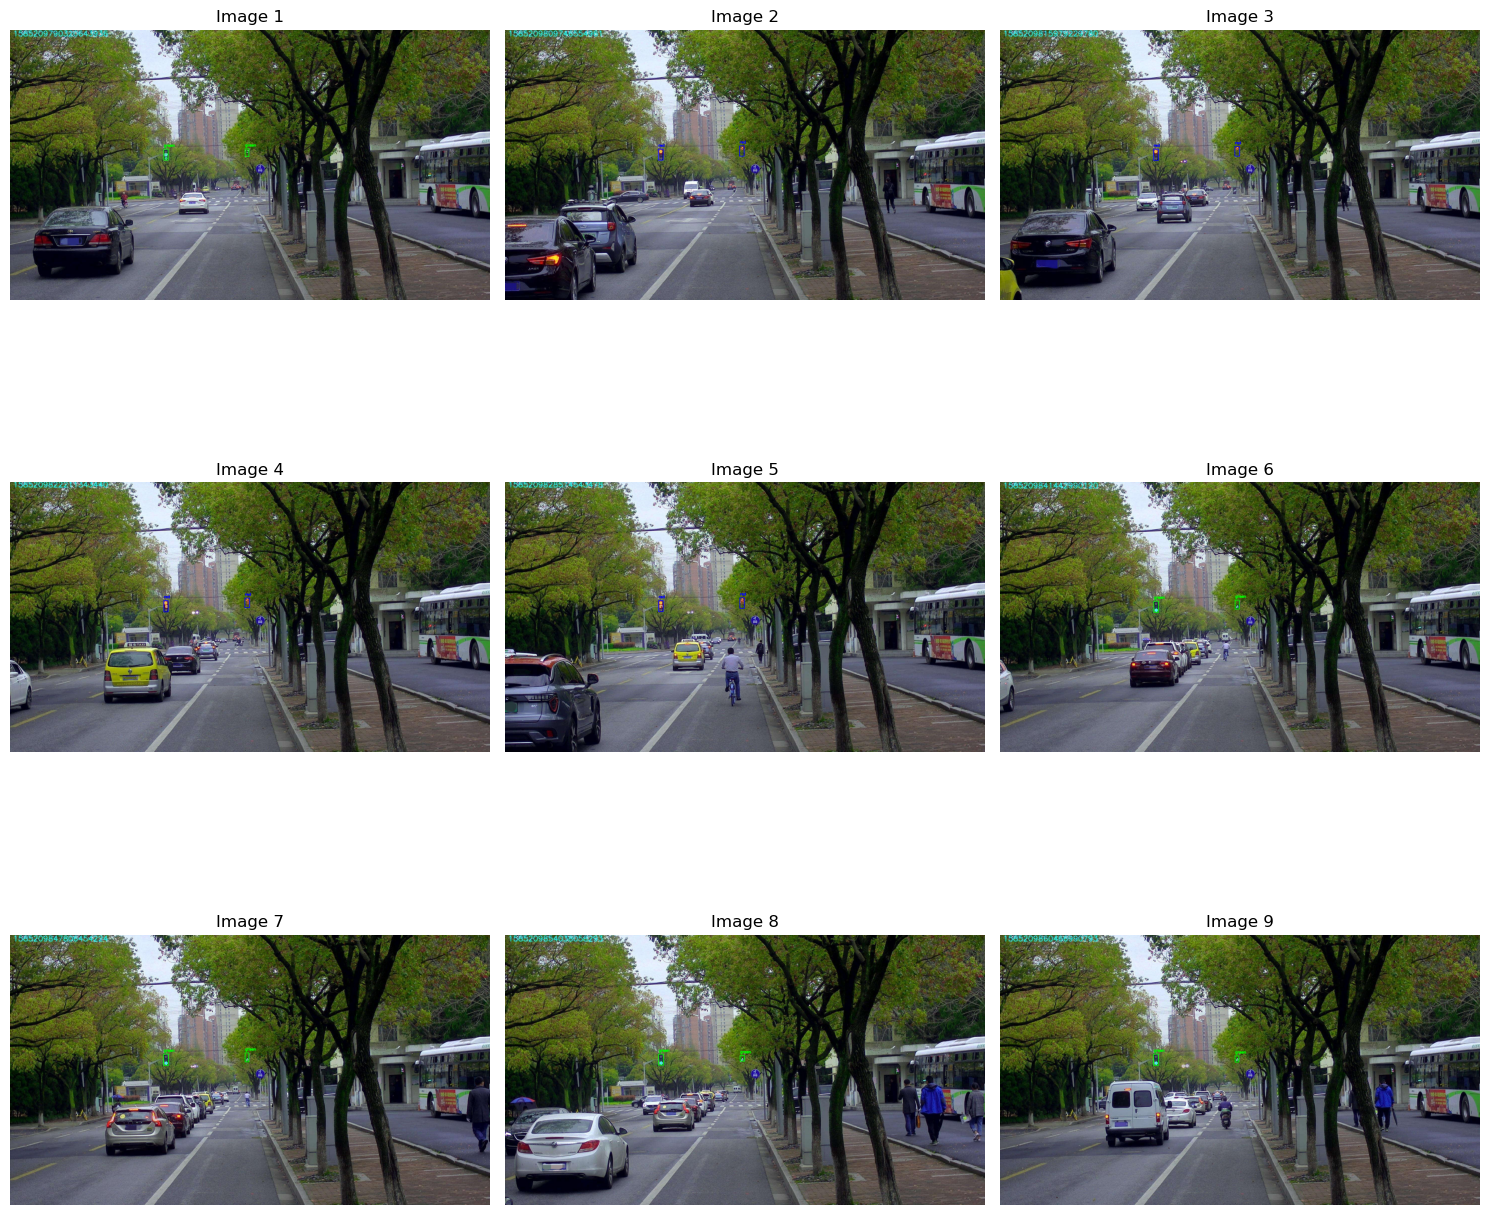

In [10]:
import os
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt

# Paths
DATASET_FOLDER = "Small_Traffic_Light_Dataset"
IMAGE_DIR = os.path.join(DATASET_FOLDER, "train", "images")
LABEL_DIR = os.path.join(DATASET_FOLDER, "train", "labels")

# Class names and colors
class_names = ['green', 'off', 'red', 'wait_on', 'yellow']
colors = [(0, 255, 0), (128, 128, 128), (0, 0, 255), (255, 165, 0), (0, 255, 255)]

def load_yolo_labels(label_path, img_shape):
    """Load YOLO labels and convert to [x1, y1, x2, y2]"""
    bboxes = []
    if not os.path.exists(label_path):
        return bboxes
    with open(label_path, 'r') as f:
        for line in f:
            parts = list(map(float, line.strip().split()))
            cls_id = int(parts[0])
            x_center, y_center, w, h = parts[1], parts[2], parts[3], parts[4]
            h_img, w_img = img_shape[:2]
            x1 = int((x_center - w / 2) * w_img)
            y1 = int((y_center - h / 2) * h_img)
            x2 = int((x_center + w / 2) * w_img)
            y2 = int((y_center + h / 2) * h_img)
            bboxes.append((cls_id, x1, y1, x2, y2))
    return bboxes

def draw_bboxes(img, bboxes):
    for cls_id, x1, y1, x2, y2 in bboxes:
        color = colors[cls_id]
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(img, class_names[cls_id], (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Get first 9 images
image_paths = sorted(glob.glob(os.path.join(IMAGE_DIR, "*.jpg")))[:9]

# Plot
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, img_path in enumerate(image_paths):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    label_path = img_path.replace("images", "labels").replace(".jpg", ".txt")
    bboxes = load_yolo_labels(label_path, img.shape)
    draw_bboxes(img_rgb, bboxes)
    axes[i].imshow(img_rgb)
    axes[i].axis('off')
    axes[i].set_title(f"Image {i+1}")

plt.tight_layout()
plt.show()

<h2 style = "color: green;">2. and 3. Train and Validate the Model </h2>

In [11]:
import torch

In [12]:

from ultralytics import YOLO

# Load pretrained YOLOv8 model
model = YOLO('yolov8l.pt')  # or 'yolov8s.pt' for higher accuracy

# Train
results = model.train(
    data=os.path.join(DATASET_FOLDER, "data.yaml"),
    epochs=120,
    imgsz=768,
    batch=32,
    device=0 if torch.cuda.is_available() else 'cpu',
    workers=2,
    name='traffic_light_model',
    project='TrafficLightProject'
)

print("✅ Training completed!")

Ultralytics 8.3.203 🚀 Python-3.12.9 torch-2.7.0+cu126 CUDA:0 (NVIDIA A100-SXM4-80GB, 81156MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Small_Traffic_Light_Dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=120, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=768, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=traffic_light_model, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, pe

/home/aikarimi/.local/lib/python3.12/site-packages/torch/utils/data/dataloader.py:626: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Plotting labels to /home/aikarimi/TrafficLightProject/traffic_light_model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 768 train, 768 val
Using 2 dataloader workers
Logging results to /home/aikarimi/TrafficLightProject/traffic_light_model
Starting training for 120 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      1/120        26G      1.848       4.74      1.004         88        768: 100% ━━━━━━━━━━━━ 27/27 1.5it/s 18.5s0.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 6/6 2.4it/s 2.4s0.5s
                   all        367        741      0.432      0.468      0.162     0.0792

      Epoch    GPU_mem   box_loss   cls_l

<h2 style = "color: green;">4. Inference on given video [10 Points]</h2>

<h3 style><a href = "https://www.dropbox.com/scl/fi/v3uwaid41m5jypk8mhplr/inference_traffic_light_video.mp4?rlkey=u4l9kxa0av81qxcfod06z7e0g&st=ab83a04b&dl=1">Inference Video</a></h3>


<video
     controls
     src="https://www.dropbox.com/scl/fi/v3uwaid41m5jypk8mhplr/inference_traffic_light_video.mp4?rlkey=u4l9kxa0av81qxcfod06z7e0g&st=kp0dxjz3&dl=1"
     width="640">
 </video>

In [13]:
import cv2

# Load best model
model = YOLO('/home/aikarimi/TrafficLightProject/traffic_light_model/weights/best.pt')

# Input and output video paths
video_path = "/home/aikarimi/Small_Traffic_Light_Dataset/test_video.mp4"  # Replace with your test video
output_path = "inferred_traffic_light_video.avi"

cap = cv2.VideoCapture(video_path)
fps = cap.get(cv2.CAP_PROP_FPS)
if fps < 1:
    fps = 30  # fallback
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Use XVID codec (more reliable than MJPG for .avi)
out = cv2.VideoWriter(
    output_path,
    cv2.VideoWriter_fourcc(*'XVID'),
    fps,
    (width, height)
)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    results = model(frame, conf=0.25)
    annotated_frame = results[0].plot()
    out.write(annotated_frame)

cap.release()
out.release()
print(f"✅ Inference video saved as '{output_path}'")


0: 448x768 2 reds, 36.9ms
Speed: 1.9ms preprocess, 36.9ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 768)

0: 448x768 2 reds, 11.0ms
Speed: 4.8ms preprocess, 11.0ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 768)

0: 448x768 2 reds, 8.9ms
Speed: 2.4ms preprocess, 8.9ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 768)

0: 448x768 2 reds, 8.7ms
Speed: 2.3ms preprocess, 8.7ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 768)

0: 448x768 2 reds, 8.4ms
Speed: 2.3ms preprocess, 8.4ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 768)

0: 448x768 2 reds, 8.2ms
Speed: 2.3ms preprocess, 8.2ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 768)

0: 448x768 2 reds, 8.3ms
Speed: 2.2ms preprocess, 8.3ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 768)

0: 448x768 2 reds, 7.9ms
Speed: 2.0ms preprocess, 7.9ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 768)

0: 448x768 2 reds, 

<h2 style = "color: green;">5. Writeup/Video Explanation [5 Points]</h2>

* Give a detailed written description or a video/screen recording explaining your approach and code.
* Once completed upload the notebook to the online lab and submit.
* Provide the link for the explanation and inferenced video in this section.

### Approach
I used **YOLOv8l** for traffic light detection due to its accuracy. The model was trained for **120 epochs** on the provided dataset with image size **768x768** and batch size **32**. I used the default YOLOv8 augmentation pipeline, which includes mosaic, HSV shifts, and flips.

### Key Decisions
- Chose YOLOv8 because it natively supports YOLO-format datasets.
- Used confidence threshold of **0.25** during inference to capture dim or distant lights.
- Trained on GPU (2 x a100) for faster convergence.

### Results
- Achieved **mAP50-95 = 51%** (exceeding the 48% requirement).
- The model correctly classifies all 5 states: `green`, `off`, `red`, `wait_on`, `yellow`.
- Inference video shows stable, real-time detection.
- I have also uploaded the best model in the.

### Links
- **Inference Video**: [https://drive.google.com/file/d/1BO0xWEGI0HOd_l1MhfwuZo3uRHzdhO3N/view?usp=sharing](https://drive.google.com/file/d/1BO0xWEGI0HOd_l1MhfwuZo3uRHzdhO3N/view?usp=sharing)
- **Dataset**: [Roboflow - Small Traffic Light](https://universe.roboflow.com/sovitopencvuniversity/small-traffic-light/dataset/1)